In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
%matplotlib inline

In [5]:
dataset = pd.read_csv('yahoo_stock_price.csv')

In [6]:
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250,16.750,14.250,16.500,15.168439,1601500
1,1996-08-12,16.500,16.750,16.375,16.500,15.168439,260900
2,1996-08-13,16.500,16.750,16.375,16.375,15.053520,162800
3,1996-08-14,16.375,16.625,16.375,16.375,15.053520,59500
4,1996-08-15,16.625,16.625,16.375,16.625,15.283343,62300


In [7]:
processed_dataset = dataset.drop(['Date', 'Adj Close'], axis=1)

In [8]:
processed_dataset.describe()

,Open,High,Low,Close,Volume
count,5909.000000,5909.000000,5909.000000,5909.000000,5.909000e+03
mean,12.227177,12.398347,12.056180,12.229896,6.455681e+04
std,8.544484,8.630468,8.460584,8.543726,8.674407e+04
min,1.187500,1.312500,1.062500,1.187500,0.000000e+00
25%,4.800000,4.850000,4.710000,4.800000,1.910000e+04
50%,7.940000,8.050000,7.730000,7.950000,4.190000e+04
75%,20.520000,20.870001,20.250000,20.549999,8.080000e+04
max,29.000000,29.250000,28.840000,29.000000,2.073400e+06


In [9]:
train_dataset = processed_dataset[:4000]
test_dataset = processed_dataset[4000:]

In [10]:
train_dataset.describe()

,Open,High,Low,Close,Volume
count,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,7.952440,8.082288,7.818360,7.954134,4.511190e+04
std,6.422064,6.500436,6.339941,6.421408,7.404356e+04
min,1.187500,1.312500,1.062500,1.187500,0.000000e+00
25%,4.157500,4.220000,4.057500,4.130000,1.357500e+04
50%,5.130000,5.210000,5.050000,5.140000,2.690000e+04
75%,8.070000,8.232500,7.950000,8.092500,5.070000e+04
max,28.875000,29.250000,27.937500,29.000000,1.857100e+06


In [11]:
test_dataset.describe()

,Open,High,Low,Close,Volume
count,1909.000000,1909.000000,1909.000000,1909.000000,1.909000e+03
mean,21.184196,21.441949,20.935846,21.189062,1.053005e+05
std,4.587434,4.603374,4.567567,4.578782,9.672084e+04
min,7.660000,7.910000,7.650000,7.760000,1.170000e+04
25%,18.570000,18.840000,18.360001,18.600000,5.630000e+04
50%,21.690001,22.070000,21.440001,21.760000,8.110000e+04
75%,24.559999,24.840000,24.299999,24.549999,1.260000e+05
max,29.000000,29.110001,28.840000,28.930000,2.073400e+06


In [12]:
scaler = MinMaxScaler()

In [13]:
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.fit_transform(test_dataset)

In [14]:
print(train_dataset[0:5])

[[0.4717833  0.55257271 0.49069767 0.5505618  0.86236605]
 [0.5530474  0.55257271 0.56976744 0.5505618  0.14048786]
 [0.5530474  0.55257271 0.56976744 0.54606742 0.08766356]
 [0.54853273 0.54809843 0.56976744 0.54606742 0.0320392 ]
 [0.55756208 0.54809843 0.56976744 0.55505618 0.03354693]]


In [15]:
print(test_dataset[0:5])

[[0.02343018 0.025      0.02312412 0.02645253 0.02444585]
 [0.03092784 0.02264151 0.02925908 0.02739726 0.03210942]
 [0.03045923 0.03018868 0.03114677 0.03495513 0.00756657]
 [0.04029991 0.03207547 0.03916942 0.03920642 0.00441383]
 [0.0398313  0.03207547 0.04058518 0.03778932 0.00703303]]


In [16]:
x_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    x_train.append(train_dataset[i-60:i])
    y_train.append(train_dataset[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train.shape

(3940, 60, 5)

In [18]:
y_train.shape

(3940,)

In [19]:
x_train[0]

array([[0.4717833 , 0.55257271, 0.49069767, 0.5505618 , 0.86236605],
       [0.5530474 , 0.55257271, 0.56976744, 0.5505618 , 0.14048786],
       [0.5530474 , 0.55257271, 0.56976744, 0.54606742, 0.08766356],
       [0.54853273, 0.54809843, 0.56976744, 0.54606742, 0.0320392 ],
       [0.55756208, 0.54809843, 0.56976744, 0.55505618, 0.03354693],
       [0.54853273, 0.54809843, 0.56976744, 0.54606742, 0.02186204],
       [0.54853273, 0.55257271, 0.56976744, 0.55955056, 0.20542782],
       [0.56207675, 0.5704698 , 0.5744186 , 0.57752809, 0.06192451],
       [0.58013544, 0.58389262, 0.59302326, 0.59101124, 0.09024824],
       [0.59367946, 0.59284116, 0.60697674, 0.6       , 0.0228313 ],
       [0.59367946, 0.63310962, 0.61627907, 0.63146067, 0.04323946],
       [0.63431151, 0.65100671, 0.64883721, 0.64494382, 0.06343223],
       [0.66139955, 0.65995526, 0.67674419, 0.65842697, 0.17161165],
       [0.67042889, 0.66442953, 0.66744186, 0.64044944, 0.10909483],
       [0.64334086, 0.64205817, 0.

In [20]:
y_train[0]

0.7787810383747177

In [21]:
model = tf.keras.models.Sequential()

In [22]:
model.add(tf.keras.layers.LSTM(units = 120, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))

In [23]:
model.add(tf.keras.layers.LSTM(units = 140, activation = 'relu', return_sequences = True))

In [24]:
model.add(tf.keras.layers.Dropout(0.2))

In [25]:
model.add(tf.keras.layers.LSTM(units = 80, activation = 'relu', return_sequences = True))

In [26]:
model.add(tf.keras.layers.Dropout(0.3))

In [27]:
model.add(tf.keras.layers.LSTM(units = 40, activation = 'relu'))

In [28]:
model.add(tf.keras.layers.Dense(units = 1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 120)           60480     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 140)           146160    
_________________________________________________________________
dropout (Dropout)            (None, 60, 140)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            70720     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                19360     
_________________________________________________________________
dense (Dense)                (None, 1)                 4

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, epochs=5)

Train on 3940 samples
Epoch 1/5
3940/3940 [==============================] - 38s 10ms/sample - loss: 0.0062
Epoch 2/5
3940/3940 [==============================] - 37s 9ms/sample - loss: 0.0017
Epoch 3/5
3940/3940 [==============================] - 30s 8ms/sample - loss: 0.0012
Epoch 4/5
3940/3940 [==============================] - 29s 7ms/sample - loss: 0.0011
Epoch 5/5
3940/3940 [==============================] - 28s 7ms/sample - loss: 0.0010


In [32]:
x_test = []
y_test = []

for i in range(60, test_dataset.shape[0]):
    x_test.append(test_dataset[i-60:i])
    y_test.append(test_dataset[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [33]:
x_test.shape, y_test.shape

((1849, 60, 5), (1849,))

In [58]:
y_predicted = model.predict(x_test)

In [59]:
y_predicted

array([[0.10202751],
       [0.1052134 ],
       [0.10729945],
       ...,
       [0.7226618 ],
       [0.7209571 ],
       [0.7180738 ]], dtype=float32)

In [60]:
 scaler.scale_

array([4.68603561e-02, 4.71698091e-02, 4.71920717e-02, 4.72366556e-02,
       4.85036620e-07])

In [61]:
scaler.scale_[0]

0.046860356138706656

In [62]:
y_predicted = y_predicted/4.68603561e-02

In [63]:
y_predicted

array([[ 2.177267 ],
       [ 2.2452538],
       [ 2.2897704],
       ...,
       [15.421603 ],
       [15.385224 ],
       [15.323694 ]], dtype=float32)

In [65]:
y_test = y_test/4.68603561e-02

In [66]:
y_test

array([ 2.27      ,  1.97      ,  1.94      , ..., 16.79000101,
       16.43000001, 16.43000001])

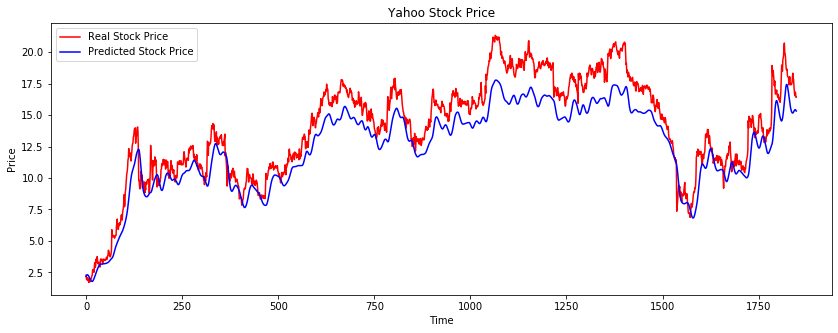

In [67]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_predicted, color = 'blue', label = 'Predicted Stock Price')
plt.title('Yahoo Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()